In [2]:
%matplotlib notebook
import matplotlib as mpl
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from qutip import *
from qutip.piqs import *
import numpy as np
import array
from matplotlib import cm

In [26]:
w1 = 1
w2 = 1

g = 0.01

ps = 0.001

s1 = tensor(sigmax(), qeye(2))
s2 = tensor(qeye(2), sigmax())

H = g * s1 * s2

ip = tensor(basis(2,1), basis(2,1))
ipd = (ip*ip.dag())
inputstate = ipd

c1 = np.sqrt(ps)
c2 = np.sqrt(1-ps)

pss =(1/np.sqrt(c1**2+c2**2))*(c1 * basis(2,1) + c2 * basis(2,0))


print("gAw = ", g/ps)


evolve = tensor(qeye(2), qeye(2)) - 1j*  g * tensor (sigmax(), sigmax())

evolve1 = (evolve.dag()*inputstate*evolve)/ps

kicked2  = tensor(qeye(2), pss.dag())*evolve1*tensor(qeye(2), pss)

ps = fidelity(pss, basis(2,1))**2

gAw =  10.0


<IPython.core.display.Javascript object>


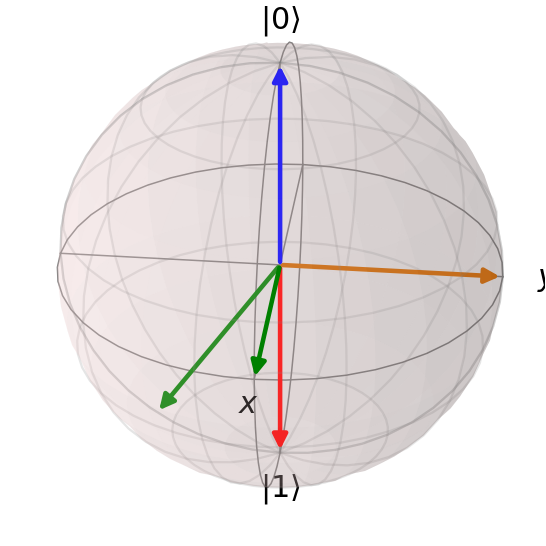

<IPython.core.display.Javascript object>


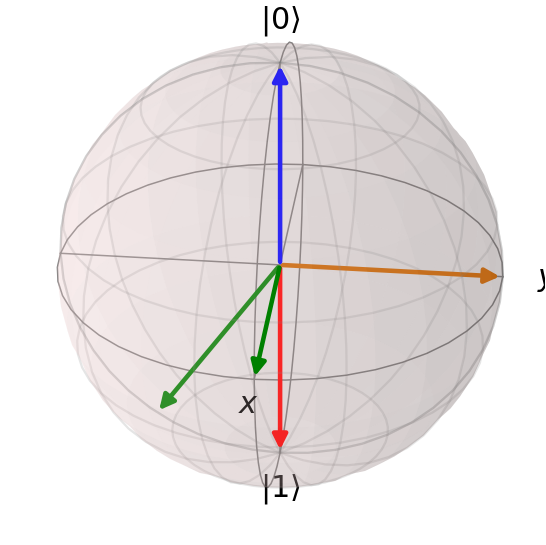

In [27]:
x = (basis(2,0)+(1+0j)*basis(2,1)).unit()
y = (basis(2,0)+(0+1j)*basis(2,1)).unit()
z = (basis(2,0)+(0+0j)*basis(2,1)).unit()
z = (basis(2,0))
b = qutip.Bloch()
x1 = (basis(2,1)).unit()
x3 = (kicked2).unit()
b.add_states([x, y, z, x1, x3])
b.show()
#post-measurement causes rotation in the bloch sphere, the angle of rotation depends on the weak value.
#red arrow is initial state, light green arrow is the kicked state.